In [83]:
#必要パッケージを取り込む
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt 
#import scipy.stats 

#csvファイルの読み込み　　
input_data=pd.read_csv("data/Economic Data - 9 Countries (1980-2020).csv")

#上から１０項目だけ表示する(確認)
input_data.head(10)

,stock index,country,area,dummy,year,index price,log_indexprice,inflationrate,oil prices,exchange_rate,gdppercent,percapitaincome,unemploymentrate,manufacturingoutput,tradebalance,USTreasury
0,NASDAQ,United States of America,America,1,1980,168.61,2.23,0.14,21.59,1.0,0.09,12575.0,0.07,NaN,-13.06,0.11
1,NASDAQ,United States of America,America,1,1981,203.15,2.31,0.10,31.77,1.0,0.12,13976.0,0.08,NaN,-12.52,0.14
2,NASDAQ,United States of America,America,1,1982,188.98,2.28,0.06,28.52,1.0,0.04,14434.0,0.10,NaN,-19.97,0.13
3,NASDAQ,United States of America,America,1,1983,285.43,2.46,0.03,26.19,1.0,0.09,15544.0,0.10,NaN,-51.64,0.11
4,NASDAQ,United States of America,America,1,1984,248.89,2.40,0.04,25.88,1.0,0.11,17121.0,0.08,NaN,-102.73,0.12
5,NASDAQ,United States of America,America,1,1985,290.25,2.46,0.04,24.09,1.0,0.07,18237.0,0.07,NaN,-114.02,0.11
6,NASDAQ,United States of America,America,1,1986,366.97,2.56,0.02,12.51,1.0,0.06,19071.0,0.07,NaN,-131.87,0.08
7,NASDAQ,United States of America,America,1,1987,402.57,2.60,0.04,15.40,1.0,0.06,20039.0,0.06,NaN,-144.77,0.08
8,NASDAQ,United States of America,America,1,1988,374.43,2.57,0.04,12.58,1.0,0.08,21417.0,0.05,NaN,-109.39,0.09
9,NASDAQ,United States of America,America,1,1989,437.80,2.64,0.05,15.86,1.0,0.08,22857.0,0.05,NaN,-86.74,0.08


In [84]:
#特定の年を抽出する
year_data = input_data[input_data["year"] == 2009]

#表示(確認)
year_data

,stock index,country,area,dummy,year,index price,log_indexprice,inflationrate,oil prices,exchange_rate,gdppercent,percapitaincome,unemploymentrate,manufacturingoutput,tradebalance,USTreasury
29,NASDAQ,United States of America,America,1,2009,1845.38,3.27,NaN,74.47,1.00,-0.03,47100.0,0.09,221.24,-396.45,0.03
70,FTSE 100,United Kingdom,Europe,1,2009,5412.88,3.73,0.02,74.47,1.57,-0.04,38736.0,0.08,221.24,-38.74,0.03
111,Nifty 50,India,Asia,0,2009,17464.81,4.24,0.11,74.47,48.33,0.08,1102.0,0.06,230.05,-73.43,0.03
152,Nikkei 225,Japan,Asia,0,2009,9346.11,3.97,-0.01,74.47,93.60,-0.05,40855.0,0.05,89.39,28.82,0.03
193,HSI,Hong Kong,Asia,0,2009,20606.72,4.31,0.01,74.47,7.75,-0.02,30697.0,0.05,3.70,16.85,0.03
234,SZCOMP,China,Asia,0,2009,2737.01,3.44,-0.01,74.47,6.83,0.09,3832.0,0.04,1611.95,220.13,0.03
275,DAX 30,Germany,Europe,1,2009,5957.43,3.78,NaN,74.47,1.39,-0.06,41650.0,0.08,603.23,170.94,0.03
316,CAC 40,France,Europe,1,2009,3936.33,3.60,NaN,74.47,1.39,-0.03,41740.0,0.09,286.02,-21.37,0.03
357,IEX 35,Spain,Europe,1,2009,11940.00,4.08,NaN,74.47,1.39,-0.04,32170.0,0.18,172.86,-13.00,0.03


In [85]:
#単回帰分析
model=sm.OLS(year_data.gdppercent, sm.add_constant(year_data.percapitaincome)) 
results=model.fit()
print(results.summary())
print('p-value\n', results.pvalues)

                            OLS Regression Results                            
Dep. Variable:             gdppercent   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     61.75
Date:                Sat, 05 Nov 2022   Prob (F-statistic):           0.000102
Time:                        23:37:22   Log-Likelihood:                 24.018
No. Observations:                   9   AIC:                            -44.04
Df Residuals:                       7   BIC:                            -43.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0856      0.014     

/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [86]:
#重回帰分析
xlist=pd.concat([year_data.dummy, year_data.percapitaincome], axis=1)
model=sm.OLS(year_data.gdppercent, sm.add_constant(xlist)) 
results=model.fit()

#表示
print(results.summary()) 
print('p-value\n', results.pvalues)

                            OLS Regression Results                            
Dep. Variable:             gdppercent   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     26.54
Date:                Sat, 05 Nov 2022   Prob (F-statistic):            0.00105
Time:                        23:37:22   Log-Likelihood:                 24.029
No. Observations:                   9   AIC:                            -42.06
Df Residuals:                       6   BIC:                            -41.47
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0858      0.015     

/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


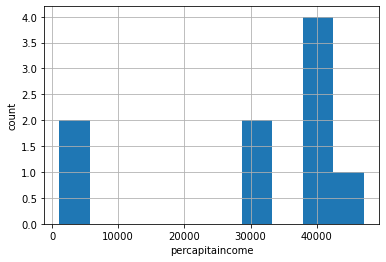

In [87]:
#ヒストグラム
plt.hist(year_data.percapitaincome) 
plt.xlabel('percapitaincome') 
plt.ylabel('count')
plt.grid(True)

Text(0.5, 0, 'percapitaincome')

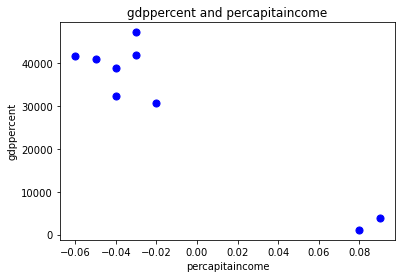

In [88]:
#散布図
plt.scatter(year_data.gdppercent,year_data.percapitaincome, s=50, c="blue") 
plt.title('gdppercent and percapitaincome')
plt.ylabel('gdppercent')
plt.xlabel('percapitaincome')